<a href="https://colab.research.google.com/github/TonyVM/codigo-tesis-parkinson/blob/master/COmparacion_DFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/dataset/174/parkinsons

#Instalando Libraries

In [2]:
!pip install optuna
!pip install catboost

  Using cached catboost-1.2.8-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.4 MB/s eta 0:00:00


#Importando librerias

In [14]:
# import numpy as np
# import warnings
# from sklearn.exceptions import ConvergenceWarning
# warnings.filterwarnings('ignore', category=ConvergenceWarning)
# from sklearn.pipeline import make_pipeline
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# import seaborn as sns
# import matplotlib.pyplot as plt
# import optuna

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
# from catboost import CatBoostClassifier
# from sklearn.decomposition import PCA
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# import lightgbm as lgb

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignorar advertencias de convergencia para un output más limpio
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# --- Preprocesamiento y Modelado ---
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import make_pipeline

# --- Métricas ---
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# --- Algoritmos ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#Examine the Dataset

In [28]:
try:
  data_dir: str = 'Parkinsson_disease.csv'
  df: pd.DataFrame = pd.read_csv(data_dir)
except FileNotFoundError:
  print(f"Error al leer el archivo, no se pudo encontrar, asegurate de que está en la ruta correcta")
  exit()
# data_dir_2 = 'train_scaled.csv' #'train-v1.2.csv'
# df2 = pd.read_csv(data_dir_2)

# df3 = pd.read_csv('train-v1.2.csv')

In [29]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
# df2.shape

(40, 29)

In [13]:
# df3.shape

(1040, 29)

Get list of features in both datasets

In [30]:
features1 = list(df.columns)
# features2 = list(df2.columns)

In [31]:
print(features1)
# print(features2)

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


Estadistica descriptiva

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


#Eliminando caracteristicas que no aportan nada y seleccionando la variable objetivo

In [32]:
cols_to_drop_df = ["name", "status"]
target_df = "status"

# cols_to_drop_df2 = ["id", "class information", "UPDRS"]
# target_df2 = "class information"

# cols_to_drop_df3 = ["id", "class information", "UPDRS"]
# target_df3 = "class information"

In [33]:
# Drop the name column and extract the "status" column as target

X1 = df.drop(cols_to_drop_df, axis=1)
y1 = df[target_df]

# X2 = df2.drop(cols_to_drop_df2, axis=1)
# y2 = df2[target_df2]

# X3 = df3.drop(cols_to_drop_df3, axis=1)
# y3 = df3[target_df3]

In [ ]:
X1.isnull().sum()

In [ ]:
# X2.isnull().sum()

In [8]:
# X3

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# def train_and_evaluate_models_with_confusion_matrix(X, y):
'''    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Models with parameters
    models = {
        'Logistic Regression': LogisticRegression(
            max_iter=1000,
            random_state=42,
            class_weight='balanced',
            solver='lbfgs'
        ),
        'Decision Tree': DecisionTreeClassifier(
            random_state=42,
            max_depth=10,
            min_samples_split=5,
            class_weight='balanced',
        ),
        'Random Forest': RandomForestClassifier(
            n_estimators=200,
            criterion='log_loss',
            max_depth=15,
            min_samples_split=5,
            class_weight='balanced',
            random_state=42
        ),
        'Support Vector Classifier': SVC(
            kernel='poly',
            gamma='scale',
            C=1.0,
            random_state=42
        ),
        'XGBoost': XGBClassifier(
            use_label_encoder=False,
            max_depth=10,
            learning_rate=0.1,
            n_estimators=200,
            eval_metric='logloss',
            scale_pos_weight=3,
            random_state=42
        ),
        'CatBoost': CatBoostClassifier(
            iterations=200,
            learning_rate=0.1,
            depth=10,
            verbose=0,
            random_state=42
        )
    }

    # Training and evaluating each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_class0 = f1_score(y_test, y_pred, pos_label=0)
        f1_class1 = f1_score(y_test, y_pred, pos_label=1)

        print(f'\n{name} - F1 score: {f1:.4f}')
        print(f'\n{name} - Accuracy: {accuracy:.4f}, F1 Score-macro: {f1_macro:.4f}')
        print(f'\n{name} - F1 Score-class0: {f1_class0:.4f}, F1 Score-class1: {f1_class1:.4f}')
        # Print confusion matrix for XGBoost
        cv_scores = cross_val_score(
            model, X_train, y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring='f1_macro'
        )
        print(f'CV F1-macro: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()'''

"    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n    # Models with parameters\n    models = {\n        'Logistic Regression': LogisticRegression(\n            max_iter=1000,\n            random_state=42,\n            class_weight='balanced',\n            solver='lbfgs'\n        ),\n        'Decision Tree': DecisionTreeClassifier(\n            random_state=42,\n            max_depth=10,\n            min_samples_split=5,\n            class_weight='balanced',\n        ),\n        'Random Forest': RandomForestClassifier(\n            n_estimators=200,\n            criterion='log_loss',\n            max_depth=15,\n            min_samples_split=5,\n            class_weight='balanced',\n            random_state=42\n        ),\n        'Support Vector Classifier': SVC(\n            kernel='poly',\n            gamma='scale',\n            C=1.0,\n            random_state=42\n        ),\n        'XGBoost': XGBClassifier(\n            use_label_enco

#esto es con los modelos principales, ya se estandariza para los modelos que lo necesitan

In [34]:
def train_and_evaluate_models_improved(X, y):

  # Split de datos
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  # Escalado para modelos que lo requieren
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Calcular scale_pos_weight para XGBoost
  n_pos = np.sum(y_train == 1)
  n_neg = np.sum(y_train == 0)
  scale_pos_weight = n_neg / n_pos

  # Modelos con parámetros mejorados
  models = {
      'Logistic Regression': {
          'model': LogisticRegression(
              max_iter=1000,
              random_state=42,
              solver='lbfgs',
              class_weight='balanced'  # Manejo del desbalance
          ),
          'use_scaled': True  # Necesita escalado
      },
      'Decision Tree': {
          'model': DecisionTreeClassifier(
              random_state=42,
              max_depth=10,
              min_samples_split=5,
              class_weight='balanced'  # Manejo del desbalance
          ),
          'use_scaled': False
      },
      'Random Forest': {
          'model': RandomForestClassifier(
              n_estimators=200,
              criterion='log_loss',
              max_depth=15,
              min_samples_split=5,
              class_weight='balanced',  # Manejo del desbalance
              random_state=42
          ),
          'use_scaled': False
      },
      'Support Vector Classifier': {
          'model': SVC(
              kernel='poly',
              gamma='scale',
              C=1.0,
              class_weight='balanced',  # Manejo del desbalance
              random_state=42
          ),
          'use_scaled': True  # Necesita escalado
      },
      'XGBoost': {
          'model': XGBClassifier(
              max_depth=10,
              learning_rate=0.1,
              n_estimators=200,
              eval_metric='logloss',
              scale_pos_weight=scale_pos_weight,  # Manejo del desbalance
              random_state=42
          ),
          'use_scaled': False
      },
      'CatBoost': {
          'model': CatBoostClassifier(
              iterations=200,
              learning_rate=0.1,
              depth=10,
              class_weights=[1, scale_pos_weight],  # Manejo del desbalance
              verbose=0,
              random_state=42
          ),
          'use_scaled': False
      }
  }

  # Validación cruzada estratificada
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  print("="*80)
  print("EVALUACIÓN DE MODELOS CON VALIDACIÓN CRUZADA Y MANEJO DE DESBALANCE")
  print("="*80)

  # Entrenar y evaluar cada modelo
  for name, model_info in models.items():
      model = model_info['model']
      use_scaled = model_info['use_scaled']

      if use_scaled:
        pipeline = make_pipeline(StandardScaler(), model)
      else:
        pipeline = make_pipeline(model)

      pipeline.fit(X_train, y_train)

      y_pred = pipeline.predict(X_test)
      # Seleccionar datos escalados o no según el modelo
      X_train_use = X_train_scaled if use_scaled else X_train
      X_test_use = X_test_scaled if use_scaled else X_test

      # Entrenar modelo
      model.fit(X_train_use, y_train)

      # Predicciones
      y_pred = model.predict(X_test_use)

      # Métricas en conjunto de prueba
      accuracy = accuracy_score(y_test, y_pred)
      f1_macro = f1_score(y_test, y_pred, average='macro')
      f1_weighted = f1_score(y_test, y_pred, average='weighted')
      f1_class0 = f1_score(y_test, y_pred, pos_label=0)  # F1 para sanos
      f1_class1 = f1_score(y_test, y_pred, pos_label=1)  # F1 para Parkinson

      # Validación cruzada
      cv_f1_macro = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='f1_macro')
      cv_accuracy = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='accuracy')

      print(f'\n{name}:')
      print(f'  Test Set Results:')
      print(f'    Accuracy: {accuracy:.4f}')
      print(f'    F1-Macro: {f1_macro:.4f}')
      print(f'    F1-Weighted: {f1_weighted:.4f}')
      print(f'    F1-Sanos (Clase 0): {f1_class0:.4f}')
      print(f'    F1-Parkinson (Clase 1): {f1_class1:.4f}')
      print(f'  Cross Validation (5-fold):')
      print(f'    CV F1-Macro: {cv_f1_macro.mean():.4f} (+/- {cv_f1_macro.std() * 2:.4f})')
      print(f'    CV Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std() * 2:.4f})')

      # Matriz de confusión
      cm = confusion_matrix(y_test, y_pred)
      plt.figure(figsize=(8, 6))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=['Sanos', 'Parkinson'],
                  yticklabels=['Sanos', 'Parkinson'])
      plt.title(f'Confusion Matrix for {name}')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.show()

      # Reporte de clasificación detallado
      print(f'  Classification Report:')
      print(classification_report(y_test, y_pred, target_names=['Sanos', 'Parkinson']))
      print("-" * 60)

#lo que sigue es usando mayor cantidad de modelos

In [35]:
def train_and_eval_model(X, y):
    # Split de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Escalado para modelos que lo requieren
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Calcular scale_pos_weight para XGBoost
    n_pos = np.sum(y_train == 1)
    n_neg = np.sum(y_train == 0)
    scale_pos_weight = n_neg / n_pos

    # Modelos con parámetros mejorados
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(
                max_iter=1000,
                random_state=42,
                solver='lbfgs',
                class_weight='balanced'  # Manejo del desbalance
            ),
            'use_scaled': True  # Necesita escalado
        },
        'Logistic Regression Ridge': {
            'model': LogisticRegression(
                max_iter=1000,
                random_state=42,
                solver='lbfgs',
                penalty='l2',
                C=1.0,  # Regularización
                class_weight='balanced'
            ),
            'use_scaled': True
        },
        'Logistic Regression Lasso': {
            'model': LogisticRegression(
                max_iter=1000,
                random_state=42,
                solver='liblinear',
                penalty='l1',
                C=1.0,  # Regularización
                class_weight='balanced'
            ),
            'use_scaled': True
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(
                random_state=42,
                max_depth=10,
                min_samples_split=5,
                class_weight='balanced'  # Manejo del desbalance
            ),
            'use_scaled': False
        },
        'Random Forest': {
            'model': RandomForestClassifier(
                n_estimators=200,
                criterion='log_loss',
                max_depth=15,
                min_samples_split=5,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': False
        },
        'SVM Polynomial': {
            'model': SVC(
                kernel='poly',
                gamma='scale',
                C=1.0,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': True  # Necesita escalado
        },
        'SVM RBF': {
            'model': SVC(
                kernel='rbf',
                gamma='scale',
                C=1.0,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': True  # Necesita escalado
        },
        'SVM Linear': {
            'model': SVC(
                kernel='linear',
                C=1.0,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': True  # Necesita escalado
        },
        'KNN': {
            'model': KNeighborsClassifier(
                n_neighbors=5,
                weights='distance',  # Pesos por distancia
                metric='euclidean'
            ),
            'use_scaled': True  # KNN necesita escalado
        },
        'KNN Uniform': {
            'model': KNeighborsClassifier(
                n_neighbors=7,
                weights='uniform',  # Pesos uniformes
                metric='euclidean'
            ),
            'use_scaled': True  # KNN necesita escalado
        },
        'Neural Network': {
            'model': MLPClassifier(
                hidden_layer_sizes=(100, 50),  # 2 capas ocultas
                max_iter=2000,
                random_state=42,
                solver='adam',
                alpha=0.01,  # Regularización L2
                learning_rate='adaptive',
                early_stopping=True,
                validation_fraction=0.1
            ),
            'use_scaled': True  # Redes neuronales necesitan escalado
        },
        'Neural Network Small': {
            'model': MLPClassifier(
                hidden_layer_sizes=(50,),  # 1 capa oculta pequeña
                max_iter=2000,
                random_state=42,
                solver='lbfgs',  # Mejor para datasets pequeños
                alpha=0.1,  # Más regularización para evitar overfitting
                tol=1e-3
            ),
            'use_scaled': True
        },
        'XGBoost': {
            'model': XGBClassifier(
                max_depth=10,
                learning_rate=0.1,
                n_estimators=200,
                eval_metric='logloss',
                scale_pos_weight=scale_pos_weight,  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': False
        },
        'CatBoost': {
            'model': CatBoostClassifier(
                iterations=200,
                learning_rate=0.1,
                depth=10,
                class_weights=[1, scale_pos_weight],  # Manejo del desbalance
                verbose=0,
                random_state=42
            ),
            'use_scaled': False
        }
    }

    # Validación cruzada estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    result_list = []

    print("="*80)
    print("EVALUACIÓN DE MODELOS CON VALIDACIÓN CRUZADA Y MANEJO DE DESBALANCE")
    print("="*80)

    # Entrenar y evaluar cada modelo
    for name, model_info in models.items():
        model = model_info['model']
        use_scaled = model_info['use_scaled']

        # if use_scaled:
        #     pipeline = make_pipeline(StandardScaler(), model)
        # else:
        #     pipeline = make_pipeline(model)

        # pipeline.fit(X_train, y_train)

        #prediccion test data
        # y_pred = pipeline.predict(X_test)

        # Seleccionar datos escalados o no según el modelo
        X_train_use = X_train_scaled if use_scaled else X_train
        X_test_use = X_test_scaled if use_scaled else X_test

        # Entrenar modelo
        model.fit(X_train_use, y_train)

        # Predicciones
        y_pred = model.predict(X_test_use)

        # Métricas en conjunto de prueba
        accuracy = accuracy_score(y_test, y_pred)
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        f1_class0 = f1_score(y_test, y_pred, pos_label=0)  # F1 para sanos
        f1_class1 = f1_score(y_test, y_pred, pos_label=1)  # F1 para Parkinson

        # Validación cruzada
        cv_f1_macro = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='f1_macro')
        cv_accuracy = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='accuracy')

        print(f'\n{name}:')
        print(f'  Test Set Results:')
        print(f'    Accuracy: {accuracy:.4f}')
        print(f'    F1-Macro: {f1_macro:.4f}')
        print(f'    F1-Weighted: {f1_weighted:.4f}')
        print(f'    F1-Sanos (Clase 0): {f1_class0:.4f}')
        print(f'    F1-Parkinson (Clase 1): {f1_class1:.4f}')
        print(f'  Cross Validation (5-fold):')
        print(f'    CV F1-Macro: {cv_f1_macro.mean():.4f} (+/- {cv_f1_macro.std() * 2:.4f})')
        print(f'    CV Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std() * 2:.4f})')

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Sanos', 'Parkinson'],
                   yticklabels=['Sanos', 'Parkinson'])
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Reporte de clasificación detallado
        print(f'  Classification Report:')
        print(classification_report(y_test, y_pred, target_names=['Sanos', 'Parkinson']))
        print("-" * 60)

#Evaluando los modelos

EVALUACIÓN DE MODELOS CON VALIDACIÓN CRUZADA Y MANEJO DE DESBALANCE

Logistic Regression:
  Test Set Results:
    Accuracy: 0.7692
    F1-Macro: 0.7451
    F1-Weighted: 0.7833
    F1-Sanos (Clase 0): 0.6667
    F1-Parkinson (Clase 1): 0.8235
  Cross Validation (5-fold):
    CV F1-Macro: 0.7763 (+/- 0.0822)
    CV Accuracy: 0.8141 (+/- 0.0629)


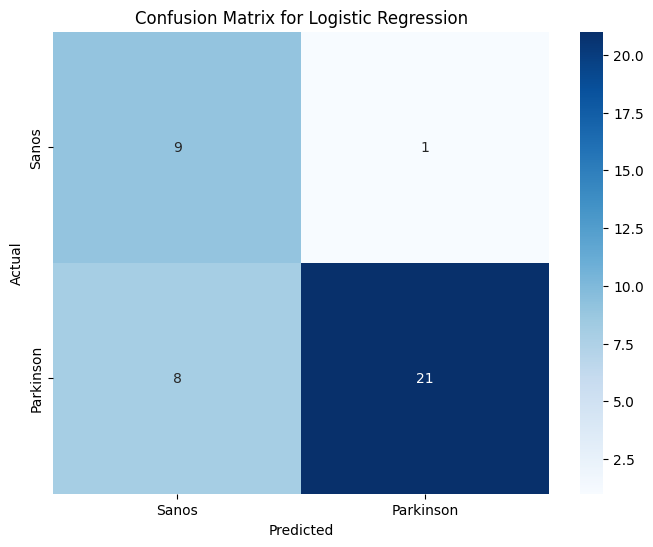

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.53      0.90      0.67        10
   Parkinson       0.95      0.72      0.82        29

    accuracy                           0.77        39
   macro avg       0.74      0.81      0.75        39
weighted avg       0.85      0.77      0.78        39

------------------------------------------------------------

Logistic Regression Ridge:
  Test Set Results:
    Accuracy: 0.7692
    F1-Macro: 0.7451
    F1-Weighted: 0.7833
    F1-Sanos (Clase 0): 0.6667
    F1-Parkinson (Clase 1): 0.8235
  Cross Validation (5-fold):
    CV F1-Macro: 0.7763 (+/- 0.0822)
    CV Accuracy: 0.8141 (+/- 0.0629)


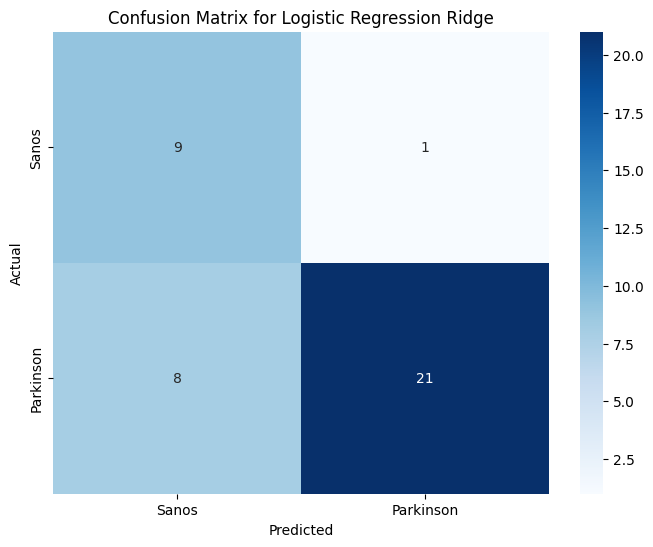

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.53      0.90      0.67        10
   Parkinson       0.95      0.72      0.82        29

    accuracy                           0.77        39
   macro avg       0.74      0.81      0.75        39
weighted avg       0.85      0.77      0.78        39

------------------------------------------------------------

Logistic Regression Lasso:
  Test Set Results:
    Accuracy: 0.7179
    F1-Macro: 0.6885
    F1-Weighted: 0.7352
    F1-Sanos (Clase 0): 0.5926
    F1-Parkinson (Clase 1): 0.7843
  Cross Validation (5-fold):
    CV F1-Macro: 0.7826 (+/- 0.0895)
    CV Accuracy: 0.8206 (+/- 0.0650)


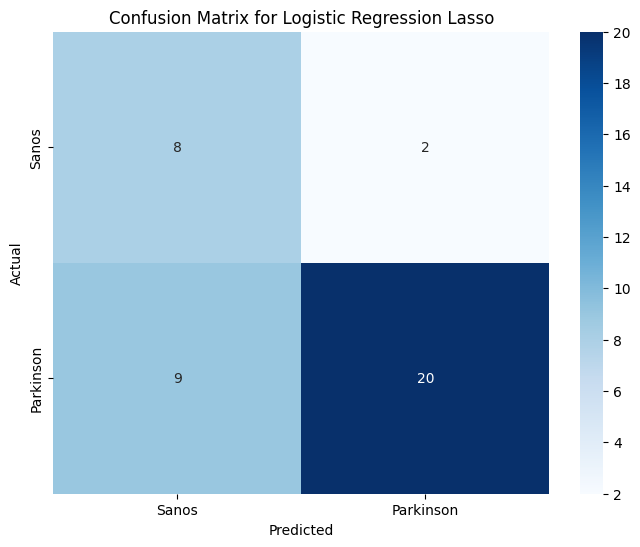

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.47      0.80      0.59        10
   Parkinson       0.91      0.69      0.78        29

    accuracy                           0.72        39
   macro avg       0.69      0.74      0.69        39
weighted avg       0.80      0.72      0.74        39

------------------------------------------------------------

Decision Tree:
  Test Set Results:
    Accuracy: 0.7949
    F1-Macro: 0.7468
    F1-Weighted: 0.8005
    F1-Sanos (Clase 0): 0.6364
    F1-Parkinson (Clase 1): 0.8571
  Cross Validation (5-fold):
    CV F1-Macro: 0.7713 (+/- 0.1950)
    CV Accuracy: 0.8210 (+/- 0.1415)


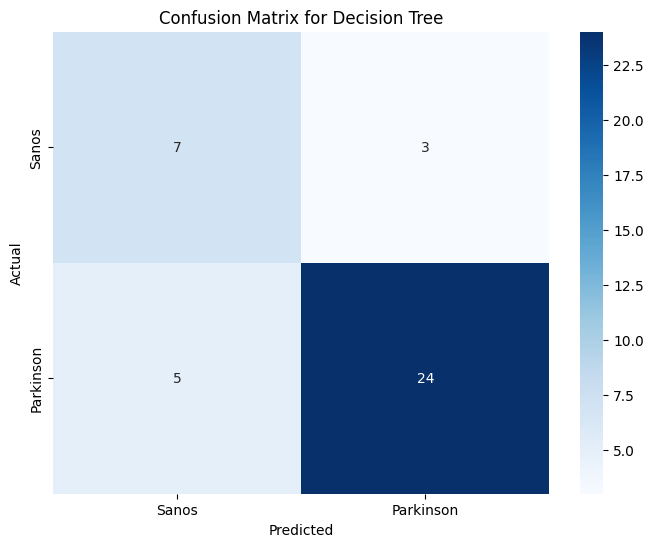

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.58      0.70      0.64        10
   Parkinson       0.89      0.83      0.86        29

    accuracy                           0.79        39
   macro avg       0.74      0.76      0.75        39
weighted avg       0.81      0.79      0.80        39

------------------------------------------------------------

Random Forest:
  Test Set Results:
    Accuracy: 0.9231
    F1-Macro: 0.8956
    F1-Weighted: 0.9217
    F1-Sanos (Clase 0): 0.8421
    F1-Parkinson (Clase 1): 0.9492
  Cross Validation (5-fold):
    CV F1-Macro: 0.8754 (+/- 0.1425)
    CV Accuracy: 0.9101 (+/- 0.1114)


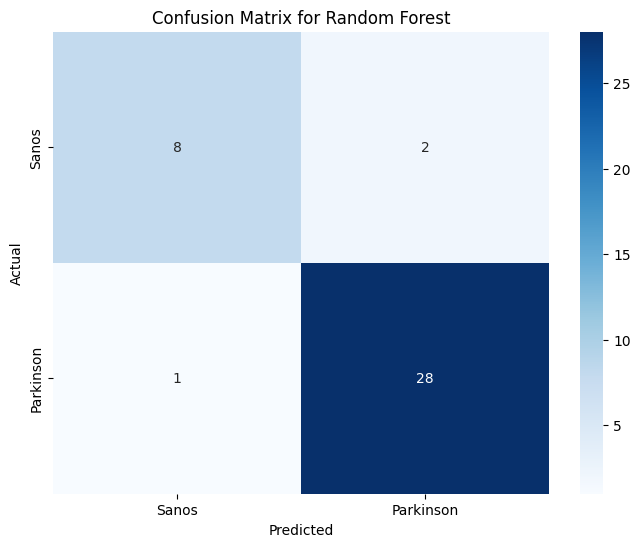

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.89      0.80      0.84        10
   Parkinson       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

------------------------------------------------------------

SVM Polynomial:
  Test Set Results:
    Accuracy: 0.8462
    F1-Macro: 0.7983
    F1-Weighted: 0.8462
    F1-Sanos (Clase 0): 0.7000
    F1-Parkinson (Clase 1): 0.8966
  Cross Validation (5-fold):
    CV F1-Macro: 0.7256 (+/- 0.1678)
    CV Accuracy: 0.8337 (+/- 0.0710)


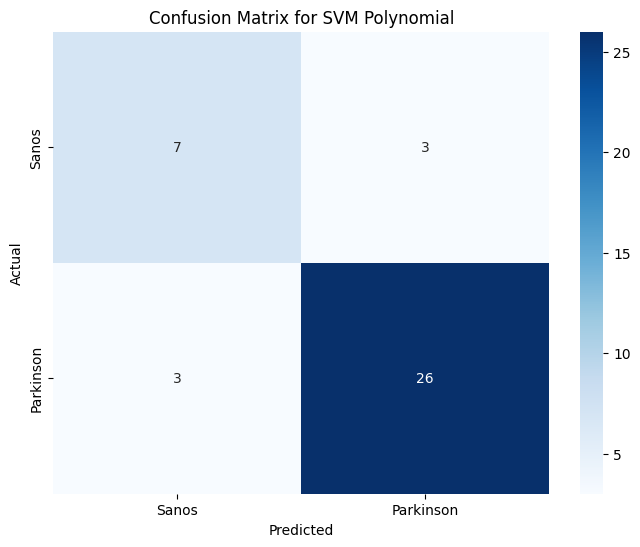

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.70      0.70      0.70        10
   Parkinson       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39

------------------------------------------------------------

SVM RBF:
  Test Set Results:
    Accuracy: 0.7949
    F1-Macro: 0.7771
    F1-Weighted: 0.8078
    F1-Sanos (Clase 0): 0.7143
    F1-Parkinson (Clase 1): 0.8400
  Cross Validation (5-fold):
    CV F1-Macro: 0.7529 (+/- 0.1486)
    CV Accuracy: 0.7883 (+/- 0.1273)


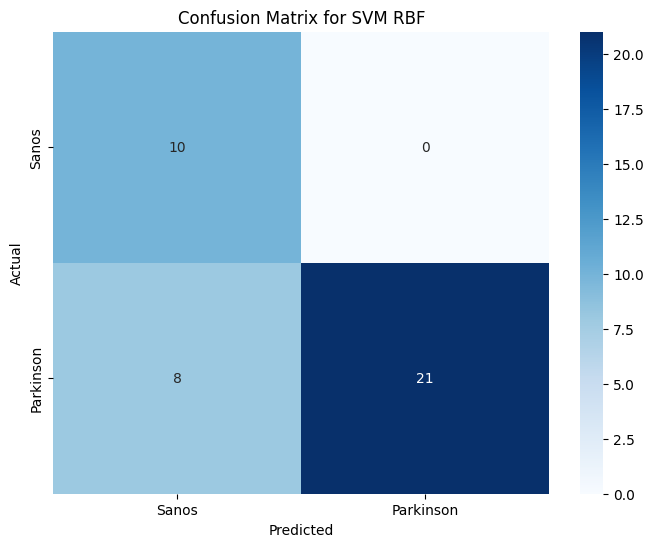

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.56      1.00      0.71        10
   Parkinson       1.00      0.72      0.84        29

    accuracy                           0.79        39
   macro avg       0.78      0.86      0.78        39
weighted avg       0.89      0.79      0.81        39

------------------------------------------------------------

SVM Linear:
  Test Set Results:
    Accuracy: 0.7949
    F1-Macro: 0.7692
    F1-Weighted: 0.8067
    F1-Sanos (Clase 0): 0.6923
    F1-Parkinson (Clase 1): 0.8462
  Cross Validation (5-fold):
    CV F1-Macro: 0.7984 (+/- 0.1254)
    CV Accuracy: 0.8337 (+/- 0.1002)


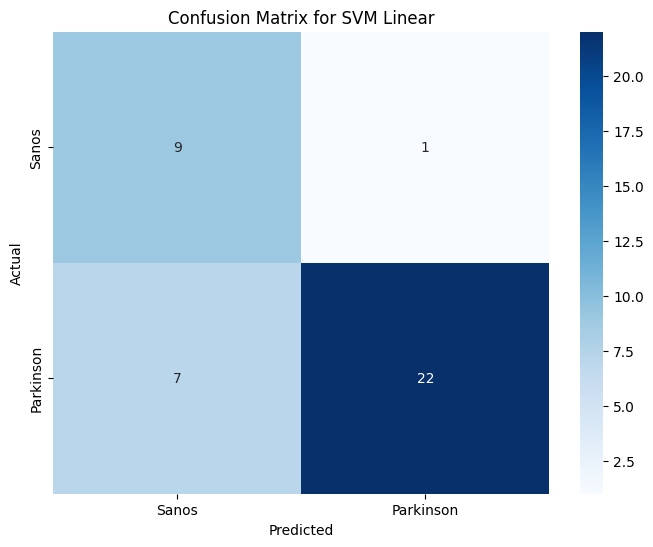

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.56      0.90      0.69        10
   Parkinson       0.96      0.76      0.85        29

    accuracy                           0.79        39
   macro avg       0.76      0.83      0.77        39
weighted avg       0.86      0.79      0.81        39

------------------------------------------------------------

KNN:
  Test Set Results:
    Accuracy: 0.9487
    F1-Macro: 0.9278
    F1-Weighted: 0.9467
    F1-Sanos (Clase 0): 0.8889
    F1-Parkinson (Clase 1): 0.9667
  Cross Validation (5-fold):
    CV F1-Macro: 0.8321 (+/- 0.1284)
    CV Accuracy: 0.8847 (+/- 0.0871)


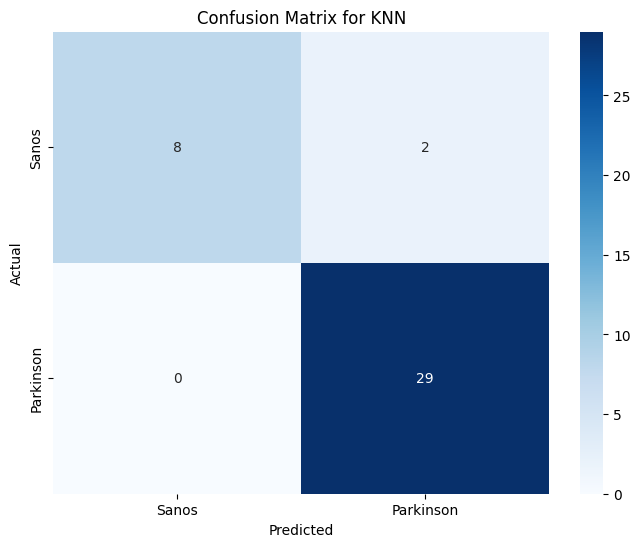

  Classification Report:
              precision    recall  f1-score   support

       Sanos       1.00      0.80      0.89        10
   Parkinson       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39

------------------------------------------------------------

KNN Uniform:
  Test Set Results:
    Accuracy: 0.8718
    F1-Macro: 0.8260
    F1-Weighted: 0.8695
    F1-Sanos (Clase 0): 0.7368
    F1-Parkinson (Clase 1): 0.9153
  Cross Validation (5-fold):
    CV F1-Macro: 0.7637 (+/- 0.2447)
    CV Accuracy: 0.8524 (+/- 0.1131)


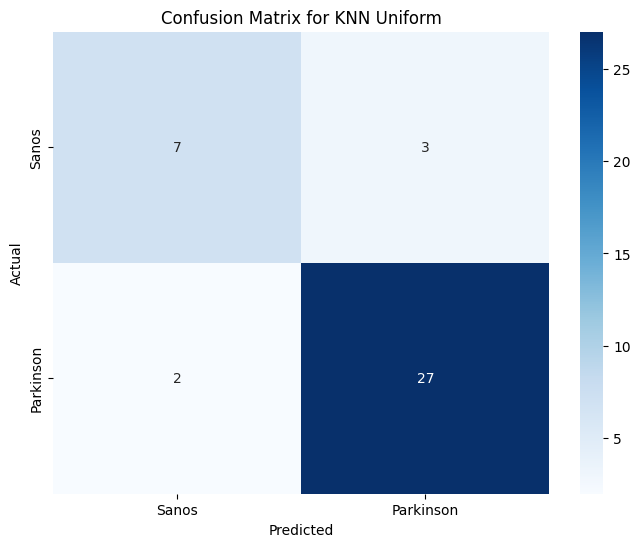

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.78      0.70      0.74        10
   Parkinson       0.90      0.93      0.92        29

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39

------------------------------------------------------------

Neural Network:
  Test Set Results:
    Accuracy: 0.8462
    F1-Macro: 0.7833
    F1-Weighted: 0.8402
    F1-Sanos (Clase 0): 0.6667
    F1-Parkinson (Clase 1): 0.9000
  Cross Validation (5-fold):
    CV F1-Macro: 0.6415 (+/- 0.2642)
    CV Accuracy: 0.7369 (+/- 0.2505)


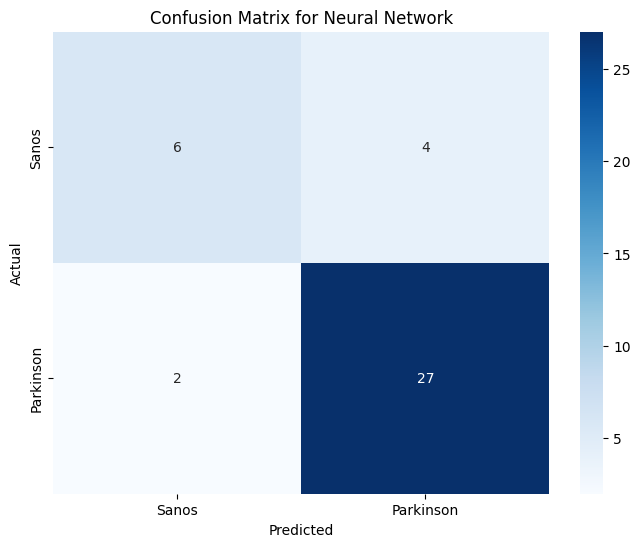

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.75      0.60      0.67        10
   Parkinson       0.87      0.93      0.90        29

    accuracy                           0.85        39
   macro avg       0.81      0.77      0.78        39
weighted avg       0.84      0.85      0.84        39

------------------------------------------------------------

Neural Network Small:
  Test Set Results:
    Accuracy: 0.9487
    F1-Macro: 0.9328
    F1-Weighted: 0.9487
    F1-Sanos (Clase 0): 0.9000
    F1-Parkinson (Clase 1): 0.9655
  Cross Validation (5-fold):
    CV F1-Macro: 0.8783 (+/- 0.1416)
    CV Accuracy: 0.9101 (+/- 0.1114)


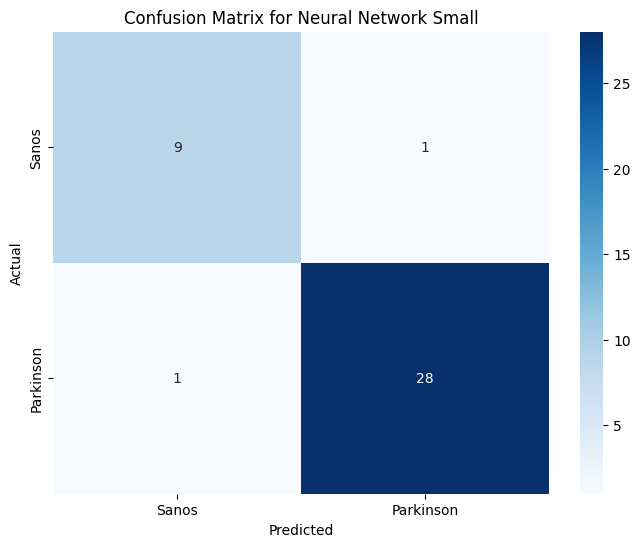

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.90      0.90      0.90        10
   Parkinson       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

------------------------------------------------------------

XGBoost:
  Test Set Results:
    Accuracy: 0.9231
    F1-Macro: 0.8956
    F1-Weighted: 0.9217
    F1-Sanos (Clase 0): 0.8421
    F1-Parkinson (Clase 1): 0.9492
  Cross Validation (5-fold):
    CV F1-Macro: 0.8489 (+/- 0.0927)
    CV Accuracy: 0.8909 (+/- 0.0663)


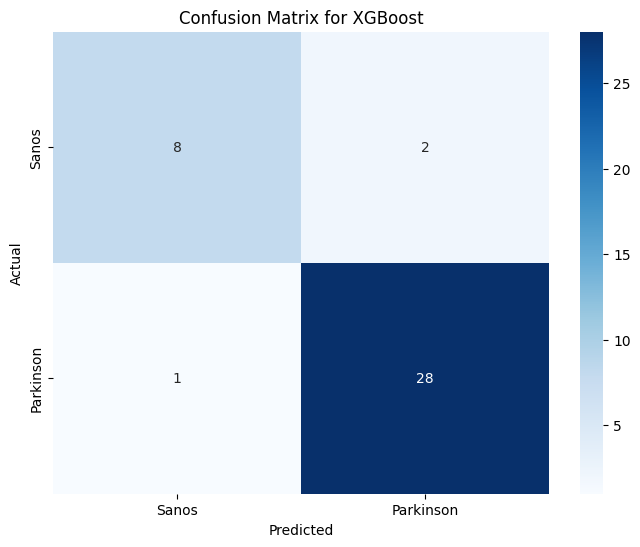

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.89      0.80      0.84        10
   Parkinson       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

------------------------------------------------------------

CatBoost:
  Test Set Results:
    Accuracy: 0.9487
    F1-Macro: 0.9328
    F1-Weighted: 0.9487
    F1-Sanos (Clase 0): 0.9000
    F1-Parkinson (Clase 1): 0.9655
  Cross Validation (5-fold):
    CV F1-Macro: 0.8798 (+/- 0.1216)
    CV Accuracy: 0.9101 (+/- 0.0953)


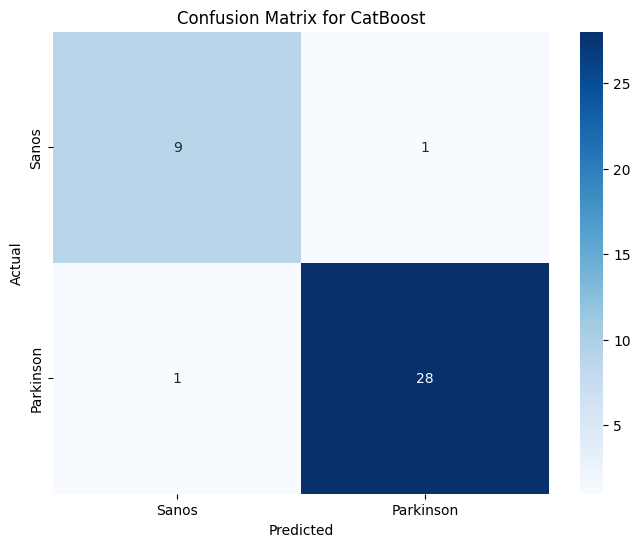

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.90      0.90      0.90        10
   Parkinson       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

------------------------------------------------------------


In [36]:
train_and_eval_model(X1, y1)

In [ ]:
train_and_evaluate_models_improved(X1, y1)

# Opcion mejorada usando pipelines

In [39]:
def train_and_eval_models(X, y):
    # Split de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Escalado para modelos que lo requieren
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Calcular scale_pos_weight para XGBoost
    n_pos = np.sum(y_train == 1)
    n_neg = np.sum(y_train == 0)
    scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1  # Evita división por cero

    # Modelos con parámetros mejorados
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(
                max_iter=1000,
                random_state=42,
                solver='lbfgs',
                class_weight='balanced'  # Manejo del desbalance
            ),
            'use_scaled': True  # Necesita escalado
        },
        'Logistic Regression Ridge': {
            'model': LogisticRegression(
                max_iter=1000,
                random_state=42,
                solver='lbfgs',
                penalty='l2',
                C=1.0,  # Regularización
                class_weight='balanced'
            ),
            'use_scaled': True
        },
        'Logistic Regression Lasso': {
            'model': LogisticRegression(
                max_iter=1000,
                random_state=42,
                solver='liblinear',
                penalty='l1',
                C=1.0,  # Regularización
                class_weight='balanced'
            ),
            'use_scaled': True
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(
                random_state=42,
                max_depth=10,
                min_samples_split=5,
                class_weight='balanced'  # Manejo del desbalance
            ),
            'use_scaled': False
        },
        'Random Forest': {
            'model': RandomForestClassifier(
                n_estimators=200,
                criterion='log_loss',
                max_depth=15,
                min_samples_split=5,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': False
        },
        'SVM Polynomial': {
            'model': SVC(
                kernel='poly',
                gamma='scale',
                C=1.0,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': True  # Necesita escalado
        },
        'SVM RBF': {
            'model': SVC(
                kernel='rbf',
                gamma='scale',
                C=1.0,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': True  # Necesita escalado
        },
        'SVM Linear': {
            'model': SVC(
                kernel='linear',
                C=1.0,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': True  # Necesita escalado
        },
        'KNN': {
            'model': KNeighborsClassifier(
                n_neighbors=5,
                weights='distance',  # Pesos por distancia
                metric='euclidean'
            ),
            'use_scaled': True  # KNN necesita escalado
        },
        'KNN Uniform': {
            'model': KNeighborsClassifier(
                n_neighbors=7,
                weights='uniform',  # Pesos uniformes
                metric='euclidean'
            ),
            'use_scaled': True  # KNN necesita escalado
        },
        'Neural Network': {
            'model': MLPClassifier(
                hidden_layer_sizes=(100, 50),  # 2 capas ocultas
                max_iter=2000,
                random_state=42,
                solver='adam',
                alpha=0.01,  # Regularización L2
                learning_rate='adaptive',
                early_stopping=True,
                validation_fraction=0.1
            ),
            'use_scaled': True  # Redes neuronales necesitan escalado
        },
        'Neural Network Small': {
            'model': MLPClassifier(
                hidden_layer_sizes=(50,),  # 1 capa oculta pequeña
                max_iter=2000,
                random_state=42,
                solver='lbfgs',  # Mejor para datasets pequeños
                alpha=0.1,  # Más regularización para evitar overfitting
                tol=1e-3
            ),
            'use_scaled': True
        },
        'XGBoost': {
            'model': XGBClassifier(
                max_depth=10,
                learning_rate=0.1,
                n_estimators=200,
                eval_metric='logloss',
                scale_pos_weight=scale_pos_weight,  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': False
        },
        'CatBoost': {
            'model': CatBoostClassifier(
                iterations=200,
                learning_rate=0.1,
                depth=10,
                class_weights=[1, scale_pos_weight],  # Manejo del desbalance
                verbose=0,
                random_state=42
            ),
            'use_scaled': False
        }
    }

    # Validación cruzada estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    result_list = []

    print("="*80)
    print("EVALUACIÓN DE MODELOS CON VALIDACIÓN CRUZADA Y MANEJO DE DESBALANCE")
    print("="*80)

    # Entrenar y evaluar cada modelo
    for name, model_info in models.items():
        model = model_info['model']
        use_scaled = model_info['use_scaled']

        if use_scaled:
            pipeline = make_pipeline(StandardScaler(), model)
        else:
            pipeline = make_pipeline(model)

        pipeline.fit(X_train, y_train)

        #prediccion test data
        y_pred = pipeline.predict(X_test)

        # Seleccionar datos escalados o no según el modelo
        # X_train_use = X_train_scaled if use_scaled else X_train
        # X_test_use = X_test_scaled if use_scaled else X_test

        # Entrenar modelo
        # model.fit(X_train_use, y_train)

        # Predicciones
        # y_pred = model.predict(X_test_use)

        # Métricas en conjunto de prueba
        accuracy = accuracy_score(y_test, y_pred)
        f1_macro = f1_score(y_test, y_pred, average='macro')
        # f1_weighted = f1_score(y_test, y_pred, average='weighted')
        f1_class0 = f1_score(y_test, y_pred, pos_label=0)  # F1 para sanos
        f1_class1 = f1_score(y_test, y_pred, pos_label=1)  # F1 para Parkinson

        # validacion curzada con cross_validate
        scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro'}
        cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring= scoring)
        cv_accuracy_mean = cv_results['test_accuracy'].mean()
        cv_accuracy_std = cv_results['test_accuracy'].std()
        cv_f1_macro_mean = cv_results['test_f1_macro'].mean()
        cv_f1_macro_std = cv_results['test_f1_macro'].std()
        # Validación cruzada
        # cv_f1_macro = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='f1_macro')
        # cv_accuracy = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='accuracy')

        print(f'\n--- {name} ---')
        print(f'  Test Set Results:')
        print(f'    Accuracy: {accuracy:.4f}')
        print(f'    F1-Macro: {f1_macro:.4f}')
        print(f'    F1-Sanos (Clase 0): {f1_class0:.4f}')
        print(f'    F1-Parkinson (Clase 1): {f1_class1:.4f}')
        print(f'  Cross Validation (5-fold on Train Set):')
        print(f'    CV Accuracy: {cv_accuracy_mean:.4f} (+/- {cv_accuracy_std * 2:.4f})')
        print(f'    CV F1-Macro: {cv_f1_macro_mean:.4f} (+/- {cv_f1_macro_std * 2:.4f})')

        # Guardar resultados para el resumen
        result_list.append({
            'Modelo': name,
            'Accuracy (Test)': accuracy,
            'F1-Macro (Test)': f1_macro,
            'F1 Sanos (Test)': f1_class0,
            'F1 Parkinson (Test)': f1_class1,
            'CV F1-Macro': cv_f1_macro_mean,
            'CV Accuracy': cv_accuracy_mean
        })

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sanos', 'Parkinson'], yticklabels=['Sanos', 'Parkinson'])
        plt.title(f'Matriz de Confusión para {name}')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()

    # 6. Resumen Comparativo Final
    results_df = pd.DataFrame(result_list).sort_values(by='CV F1-Macro', ascending=False).reset_index(drop=True)

    print("\n" + "="*80)
    print("RESUMEN COMPARATIVO DE MODELOS (Ordenado por CV F1-Macro)")
    print("="*80)
    # Formatear el DataFrame para mejor visualización
    pd.set_option('display.float_format', '{:.4f}'.format)
    print(results_df)

EVALUACIÓN DE MODELOS CON VALIDACIÓN CRUZADA Y MANEJO DE DESBALANCE

--- Logistic Regression ---
  Test Set Results:
    Accuracy: 0.7692
    F1-Macro: 0.7451
    F1-Sanos (Clase 0): 0.6667
    F1-Parkinson (Clase 1): 0.8235
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.8141 (+/- 0.0629)
    CV F1-Macro: 0.7763 (+/- 0.0822)


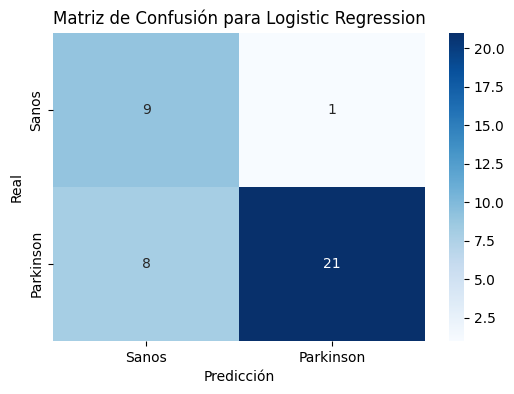


--- Logistic Regression Ridge ---
  Test Set Results:
    Accuracy: 0.7692
    F1-Macro: 0.7451
    F1-Sanos (Clase 0): 0.6667
    F1-Parkinson (Clase 1): 0.8235
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.8141 (+/- 0.0629)
    CV F1-Macro: 0.7763 (+/- 0.0822)


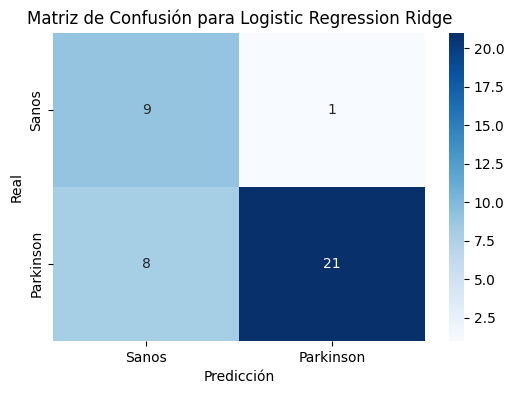


--- Logistic Regression Lasso ---
  Test Set Results:
    Accuracy: 0.7179
    F1-Macro: 0.6885
    F1-Sanos (Clase 0): 0.5926
    F1-Parkinson (Clase 1): 0.7843
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.8141 (+/- 0.0750)
    CV F1-Macro: 0.7765 (+/- 0.0973)


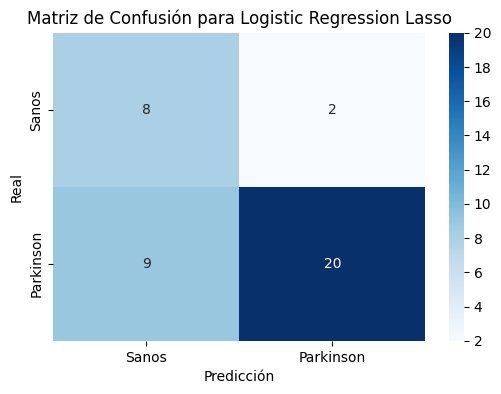


--- Decision Tree ---
  Test Set Results:
    Accuracy: 0.7949
    F1-Macro: 0.7468
    F1-Sanos (Clase 0): 0.6364
    F1-Parkinson (Clase 1): 0.8571
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.8210 (+/- 0.1415)
    CV F1-Macro: 0.7713 (+/- 0.1950)


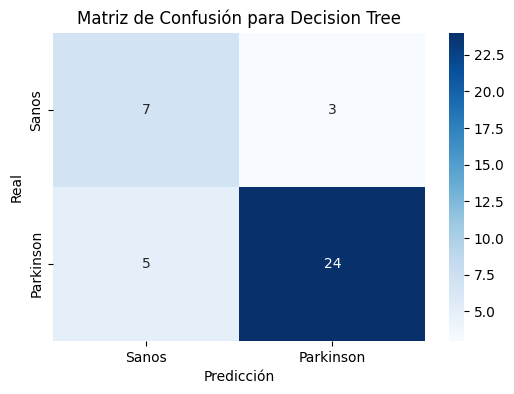


--- Random Forest ---
  Test Set Results:
    Accuracy: 0.9231
    F1-Macro: 0.8956
    F1-Sanos (Clase 0): 0.8421
    F1-Parkinson (Clase 1): 0.9492
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.9101 (+/- 0.1114)
    CV F1-Macro: 0.8754 (+/- 0.1425)


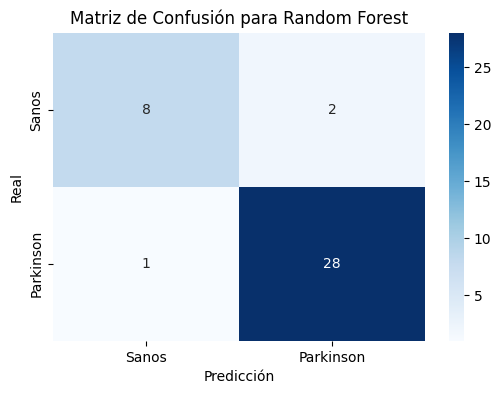


--- SVM Polynomial ---
  Test Set Results:
    Accuracy: 0.8462
    F1-Macro: 0.7983
    F1-Sanos (Clase 0): 0.7000
    F1-Parkinson (Clase 1): 0.8966
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.8337 (+/- 0.0710)
    CV F1-Macro: 0.7256 (+/- 0.1678)


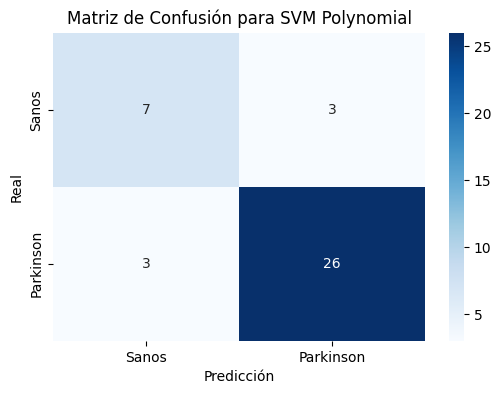


--- SVM RBF ---
  Test Set Results:
    Accuracy: 0.7949
    F1-Macro: 0.7771
    F1-Sanos (Clase 0): 0.7143
    F1-Parkinson (Clase 1): 0.8400
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.7821 (+/- 0.1249)
    CV F1-Macro: 0.7469 (+/- 0.1458)


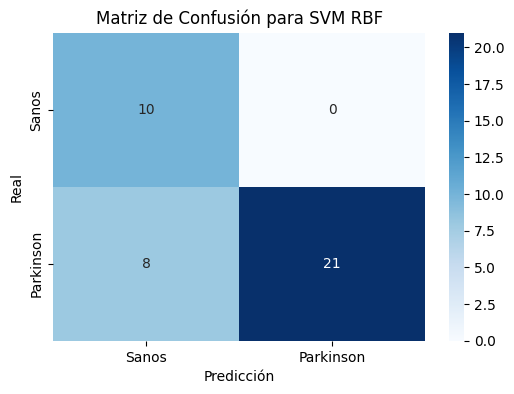


--- SVM Linear ---
  Test Set Results:
    Accuracy: 0.7949
    F1-Macro: 0.7692
    F1-Sanos (Clase 0): 0.6923
    F1-Parkinson (Clase 1): 0.8462
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.8401 (+/- 0.1047)
    CV F1-Macro: 0.8049 (+/- 0.1323)


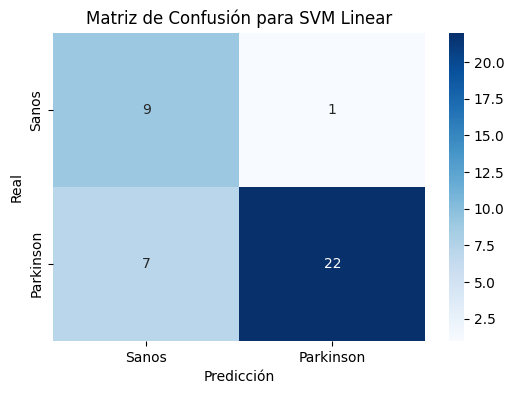


--- KNN ---
  Test Set Results:
    Accuracy: 0.9487
    F1-Macro: 0.9278
    F1-Sanos (Clase 0): 0.8889
    F1-Parkinson (Clase 1): 0.9667
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.8911 (+/- 0.0869)
    CV F1-Macro: 0.8403 (+/- 0.1225)


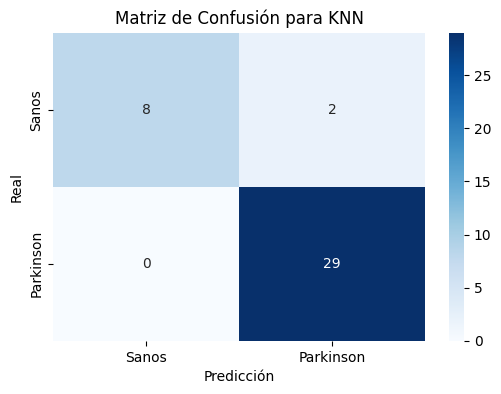


--- KNN Uniform ---
  Test Set Results:
    Accuracy: 0.8718
    F1-Macro: 0.8260
    F1-Sanos (Clase 0): 0.7368
    F1-Parkinson (Clase 1): 0.9153
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.8589 (+/- 0.1332)
    CV F1-Macro: 0.7724 (+/- 0.2678)


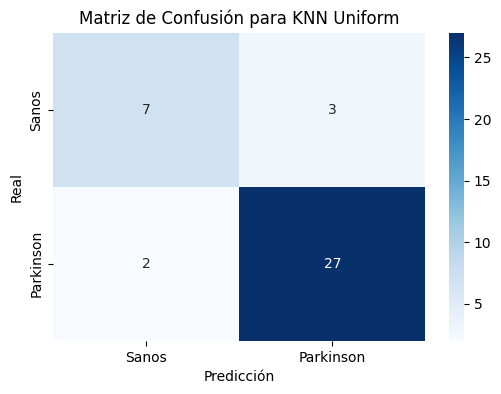


--- Neural Network ---
  Test Set Results:
    Accuracy: 0.8462
    F1-Macro: 0.7833
    F1-Sanos (Clase 0): 0.6667
    F1-Parkinson (Clase 1): 0.9000
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.7046 (+/- 0.1820)
    CV F1-Macro: 0.5845 (+/- 0.1347)


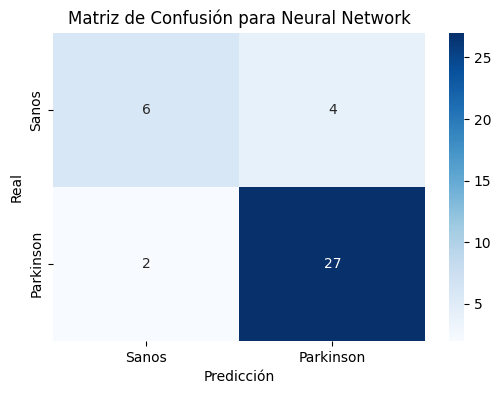


--- Neural Network Small ---
  Test Set Results:
    Accuracy: 0.9487
    F1-Macro: 0.9328
    F1-Sanos (Clase 0): 0.9000
    F1-Parkinson (Clase 1): 0.9655
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.9036 (+/- 0.0823)
    CV F1-Macro: 0.8693 (+/- 0.1111)


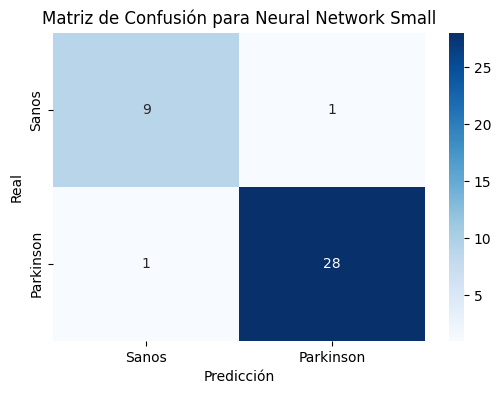


--- XGBoost ---
  Test Set Results:
    Accuracy: 0.9231
    F1-Macro: 0.8956
    F1-Sanos (Clase 0): 0.8421
    F1-Parkinson (Clase 1): 0.9492
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.8909 (+/- 0.0663)
    CV F1-Macro: 0.8489 (+/- 0.0927)


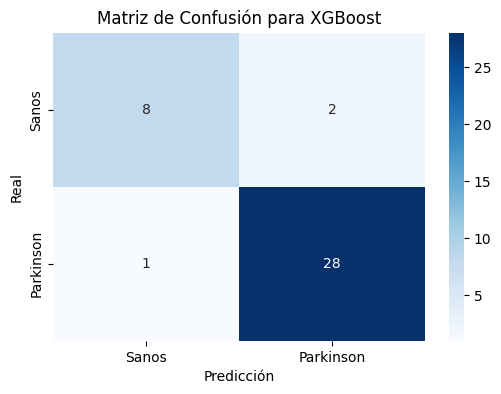


--- CatBoost ---
  Test Set Results:
    Accuracy: 0.9487
    F1-Macro: 0.9328
    F1-Sanos (Clase 0): 0.9000
    F1-Parkinson (Clase 1): 0.9655
  Cross Validation (5-fold on Train Set):
    CV Accuracy: 0.9101 (+/- 0.0953)
    CV F1-Macro: 0.8798 (+/- 0.1216)


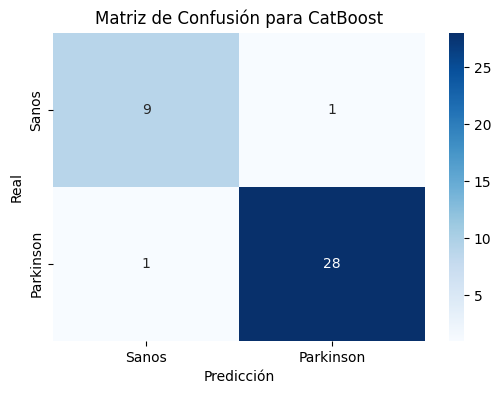


RESUMEN COMPARATIVO DE MODELOS (Ordenado por CV F1-Macro)
                       Modelo  Accuracy (Test)  ...  CV F1-Macro  CV Accuracy
0                    CatBoost           0.9487  ...       0.8798       0.9101
1               Random Forest           0.9231  ...       0.8754       0.9101
2        Neural Network Small           0.9487  ...       0.8693       0.9036
3                     XGBoost           0.9231  ...       0.8489       0.8909
4                         KNN           0.9487  ...       0.8403       0.8911
5                  SVM Linear           0.7949  ...       0.8049       0.8401
6   Logistic Regression Lasso           0.7179  ...       0.7765       0.8141
7   Logistic Regression Ridge           0.7692  ...       0.7763       0.8141
8         Logistic Regression           0.7692  ...       0.7763       0.8141
9                 KNN Uniform           0.8718  ...       0.7724       0.8589
10              Decision Tree           0.7949  ...       0.7713       0.8210
11   

In [40]:
train_and_eval_models(X1, y1)